In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.metrics import r2_score, mean_squared_error
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


## TO EVALUATE THE ONLY 3 CATEGORICAL VARIALES THAT SEEMS TO HAVE EFFECT ON RESALE PRICE

In [3]:
CatData = pd.DataFrame(data[['flat_type', 'storey_range', 'flat_model']])
CatData.head()


,flat_type,storey_range,flat_model
0,3 ROOM,07 TO 09,Improved
1,3 ROOM,04 TO 06,Improved
2,3 ROOM,07 TO 09,New Generation
3,3 ROOM,07 TO 09,New Generation
4,3 ROOM,07 TO 09,New Generation


## OneHotEncoding for the 3 categorical variables

In [4]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors
NewCat = CatData[['flat_type', 'storey_range', 'flat_model']]
ohe.fit(NewCat)
NewCat_ohe = pd.DataFrame(ohe.transform(NewCat).toarray(), 
                                  columns=ohe.get_feature_names_out(NewCat.columns))

# Check the encoded variables
NewCat_ohe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   flat_type_1 ROOM                369651 non-null  float64
 1   flat_type_2 ROOM                369651 non-null  float64
 2   flat_type_3 ROOM                369651 non-null  float64
 3   flat_type_4 ROOM                369651 non-null  float64
 4   flat_type_5 ROOM                369651 non-null  float64
 5   flat_type_EXECUTIVE             369651 non-null  float64
 6   flat_type_MULTI-GENERATION      369651 non-null  float64
 7   storey_range_01 TO 03           369651 non-null  float64
 8   storey_range_04 TO 06           369651 non-null  float64
 9   storey_range_07 TO 09           369651 non-null  float64
 10  storey_range_10 TO 12           369651 non-null  float64
 11  storey_range_13 TO 15           369651 non-null  float64
 12  storey_range_16 

## LASSO REGRESSION

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49006292597341183
Mean Squared Error (MSE) 	: 6416704843.112434

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.491262105124627
Mean Squared Error (MSE) 	: 6369298719.352492



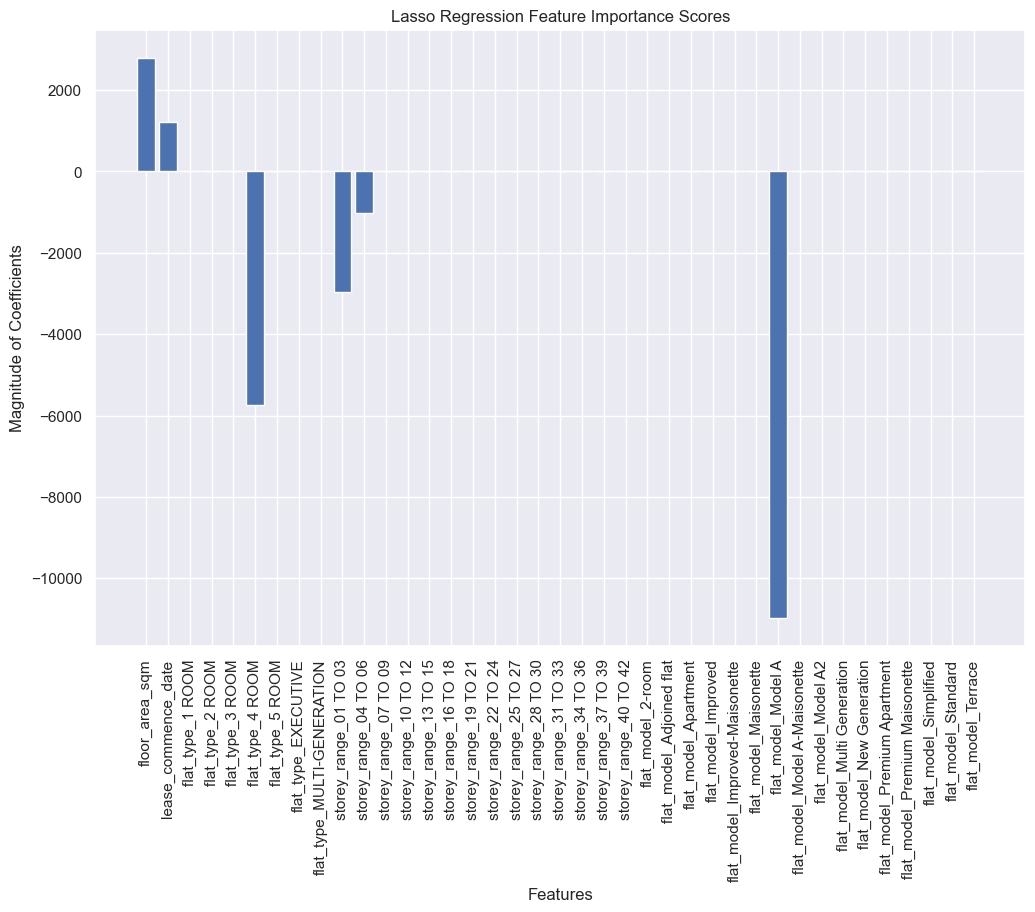

flat_model_Model A: -10968.69
flat_type_4 ROOM: -5734.40
storey_range_01 TO 03: -2950.73
floor_area_sqm: 2794.98
lease_commence_date: 1207.75
storey_range_04 TO 06: -1011.67
flat_type_1 ROOM: -0.00
flat_type_2 ROOM: 0.00
flat_type_3 ROOM: -0.00
flat_type_5 ROOM: 0.00
flat_type_EXECUTIVE: 0.00
flat_type_MULTI-GENERATION: 0.00
storey_range_07 TO 09: -0.00
storey_range_10 TO 12: -0.00
storey_range_13 TO 15: 0.00
storey_range_16 TO 18: 0.00
storey_range_19 TO 21: 0.00
storey_range_22 TO 24: 0.00
storey_range_25 TO 27: 0.00
storey_range_28 TO 30: 0.00
storey_range_31 TO 33: 0.00
storey_range_34 TO 36: 0.00
storey_range_37 TO 39: 0.00
storey_range_40 TO 42: 0.00
flat_model_2-room: 0.00
flat_model_Adjoined flat: -0.00
flat_model_Apartment: 0.00
flat_model_Improved: 0.00
flat_model_Improved-Maisonette: 0.00
flat_model_Maisonette: 0.00
flat_model_Model A-Maisonette: 0.00
flat_model_Model A2: -0.00
flat_model_Multi Generation: 0.00
flat_model_New Generation: -0.00
flat_model_Premium Apartment: 0

In [5]:
import pandas as pd
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import train_test_split

# Separate the numerical variables and the encoded categorical variables
num_vars = data[['floor_area_sqm', 'lease_commence_date']]

# Concatenate the numerical and categorical variables
X = pd.concat([num_vars, NewCat_ohe], axis=1)
y = data['resale_price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Lasso Regression model with cross-validation to find the best value of alpha
model = LassoCV(cv=5)
model.fit(X, y)

# Fit the Lasso Regression model
model = Lasso(alpha=model.alpha_)
model.fit(X_train, y_train)

# Predict using the Lasso Regression model on test data
y_pred = model.predict(X_test)

# Calculate R-squared and MSE on test data
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, model.predict(X_train)))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2)
print("Mean Squared Error (MSE) \t:", mse)
print()

# Get the coefficients of the model
coef = model.coef_

# Plot the feature importance scores
plt.figure(figsize=(12,8))
plt.bar(range(len(coef)), coef)
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Magnitude of Coefficients')
plt.title('Lasso Regression Feature Importance Scores')
plt.show()

# Create a dictionary of feature importance scores
feature_scores = {feature: score for feature, score in zip(X.columns, coef)}

# Sort the dictionary by value in descending order
sorted_scores = sorted(feature_scores.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the feature importance scores in descending order
for feature, score in sorted_scores:
    print('{}: {:.2f}'.format(feature, score))

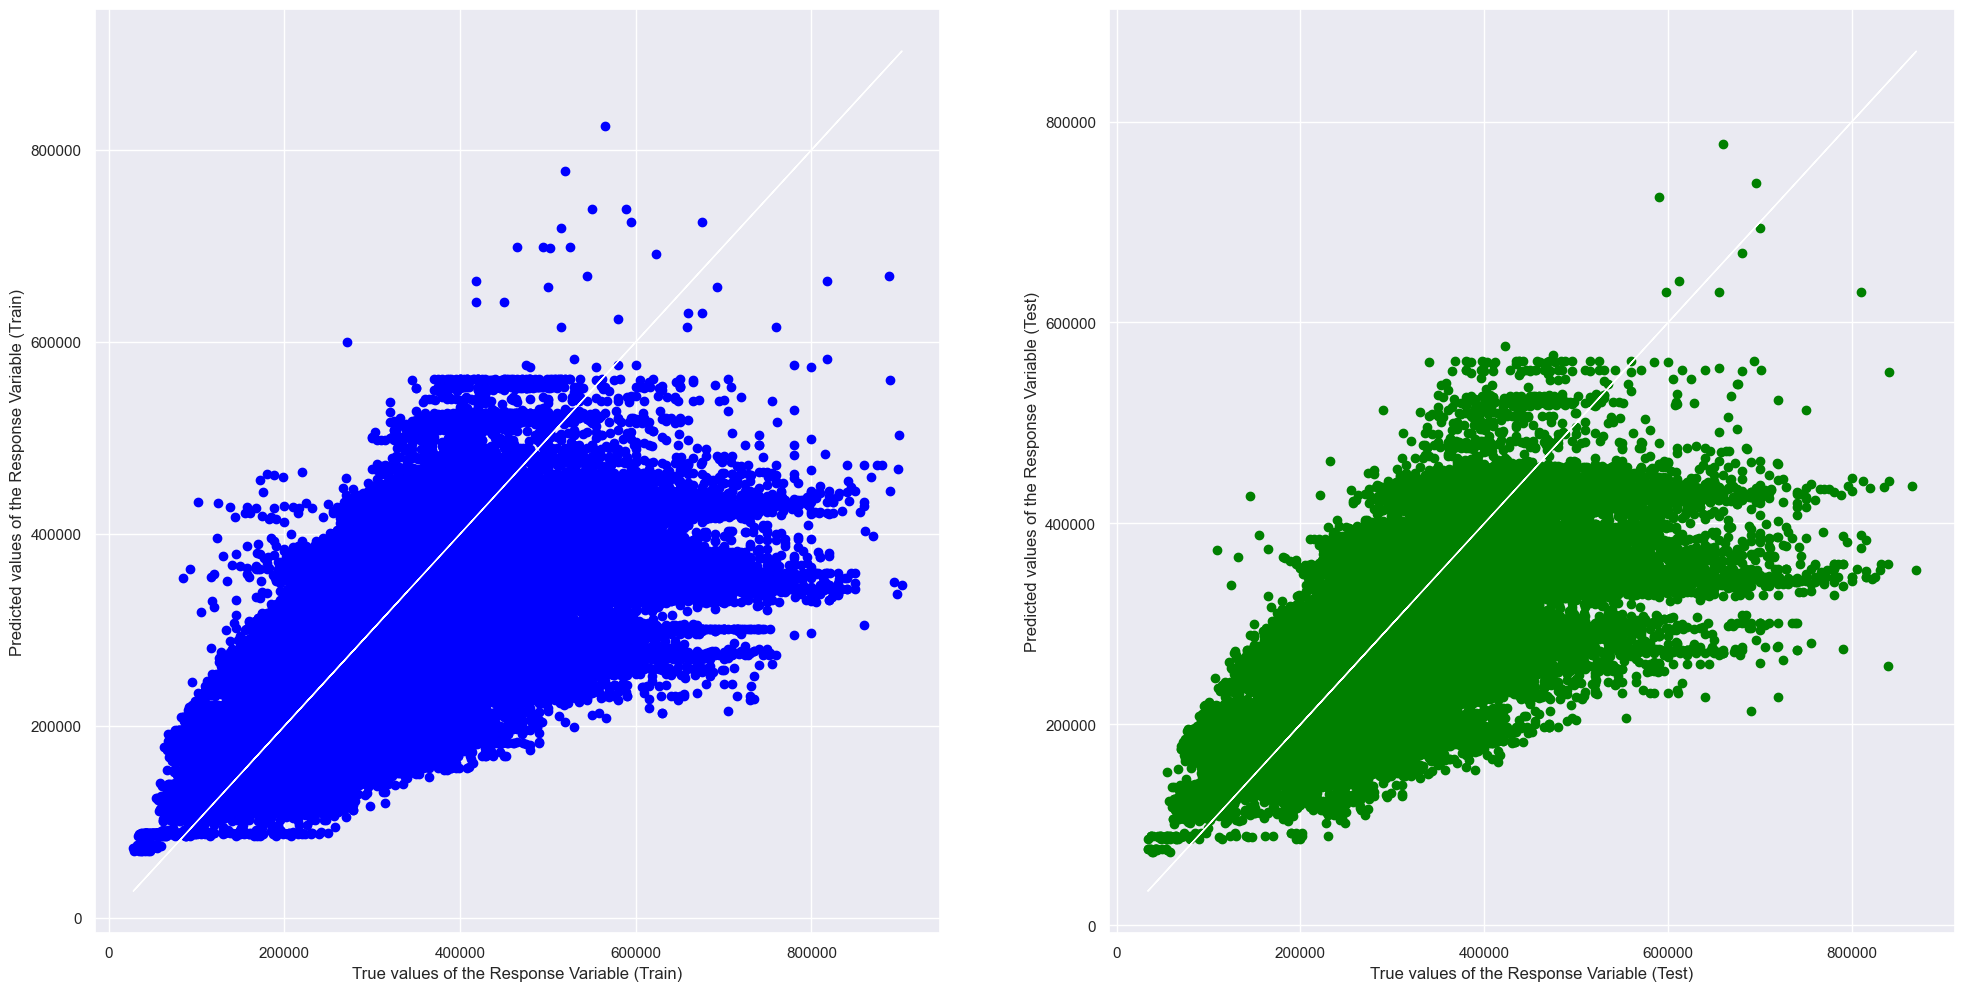

In [6]:
import matplotlib.pyplot as plt

# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [7]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, model.predict(X_train)))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2)
print("Mean Squared Error (MSE) \t:", mse)
print()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49006292597341183
Mean Squared Error (MSE) 	: 6416704843.112434

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.491262105124627
Mean Squared Error (MSE) 	: 6369298719.352492



## GRADIENT BOOSTING REGRESSION

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5837969693067601
Mean Squared Error (MSE) 	: 5237218744.813478

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5841694599538706
Mean Squared Error (MSE) 	: 5206116848.897781



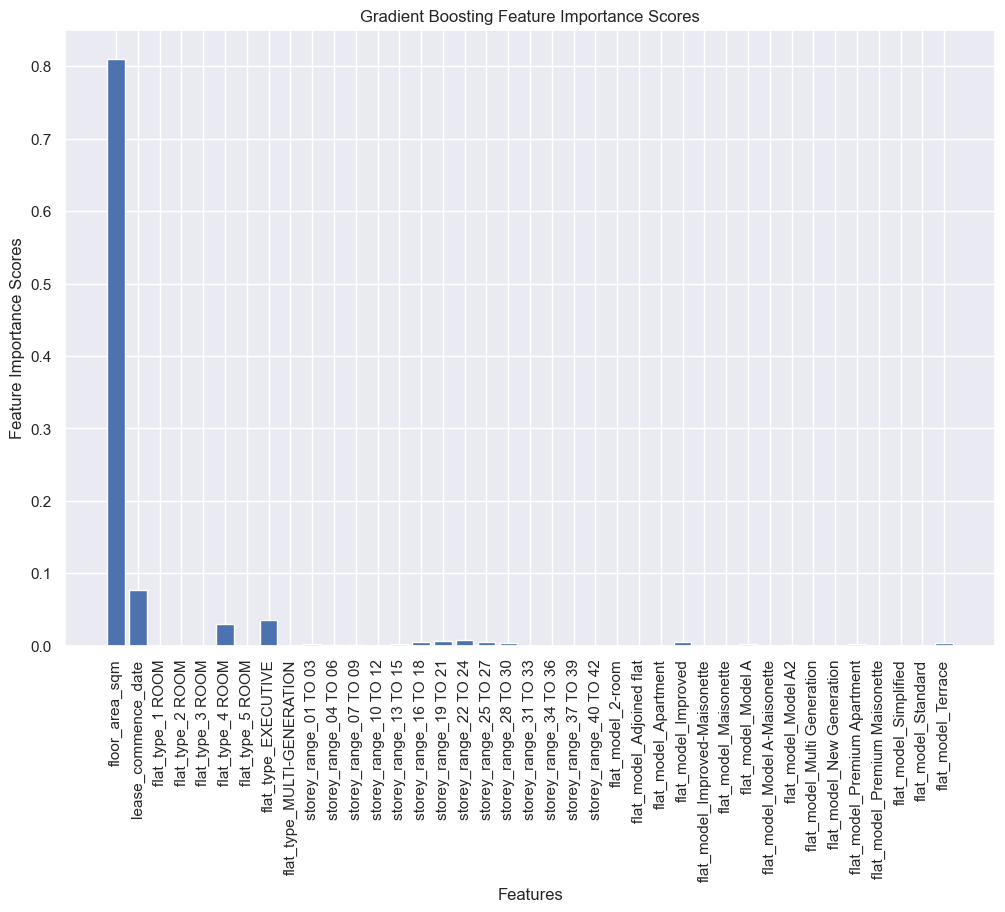

floor_area_sqm: 0.81
lease_commence_date: 0.08
flat_type_EXECUTIVE: 0.04
flat_type_4 ROOM: 0.03
storey_range_22 TO 24: 0.01
storey_range_19 TO 21: 0.01
storey_range_16 TO 18: 0.01
storey_range_25 TO 27: 0.00
flat_model_Improved: 0.00
flat_model_Terrace: 0.00
storey_range_28 TO 30: 0.00
flat_model_Model A: 0.00
storey_range_13 TO 15: 0.00
storey_range_01 TO 03: 0.00
flat_model_Premium Apartment: 0.00
storey_range_04 TO 06: 0.00
flat_model_Model A2: 0.00
storey_range_07 TO 09: 0.00
flat_model_New Generation: 0.00
flat_model_Adjoined flat: 0.00
flat_model_Model A-Maisonette: 0.00
flat_model_Apartment: 0.00
flat_type_3 ROOM: 0.00
flat_type_1 ROOM: 0.00
flat_model_Premium Maisonette: 0.00
flat_type_MULTI-GENERATION: 0.00
flat_model_Multi Generation: 0.00
flat_model_Maisonette: 0.00
storey_range_37 TO 39: 0.00
storey_range_31 TO 33: 0.00
flat_type_5 ROOM: 0.00
storey_range_10 TO 12: 0.00
flat_type_2 ROOM: 0.00
storey_range_34 TO 36: 0.00
storey_range_40 TO 42: 0.00
flat_model_2-room: 0.00
fl

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

# Separate the numerical variables and the encoded categorical variables
num_vars = data[['floor_area_sqm', 'lease_commence_date']]

# Concatenate the numerical and categorical variables
X = pd.concat([num_vars, NewCat_ohe], axis=1)
y = data['resale_price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict using the Gradient boosting model on test data
y_pred = model.predict(X_test)

# Calculate R-squared and MSE on test data
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, model.predict(X_train)))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2)
print("Mean Squared Error (MSE) \t:", mse)
print()

# Get the feature importance scores
feature_importances = model.feature_importances_

# Create a bar plot of the feature importance scores
plt.figure(figsize=(12,8))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Scores')
plt.title('Gradient Boosting Feature Importance Scores')
plt.show()

# Print the feature importance scores in descending order
sorted_scores = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)
for feature, score in sorted_scores:
    print('{}: {:.2f}'.format(feature, score))

## feature importance scores, where each score corresponds to a feature in the input data, floor_area_sqm is the best predictor

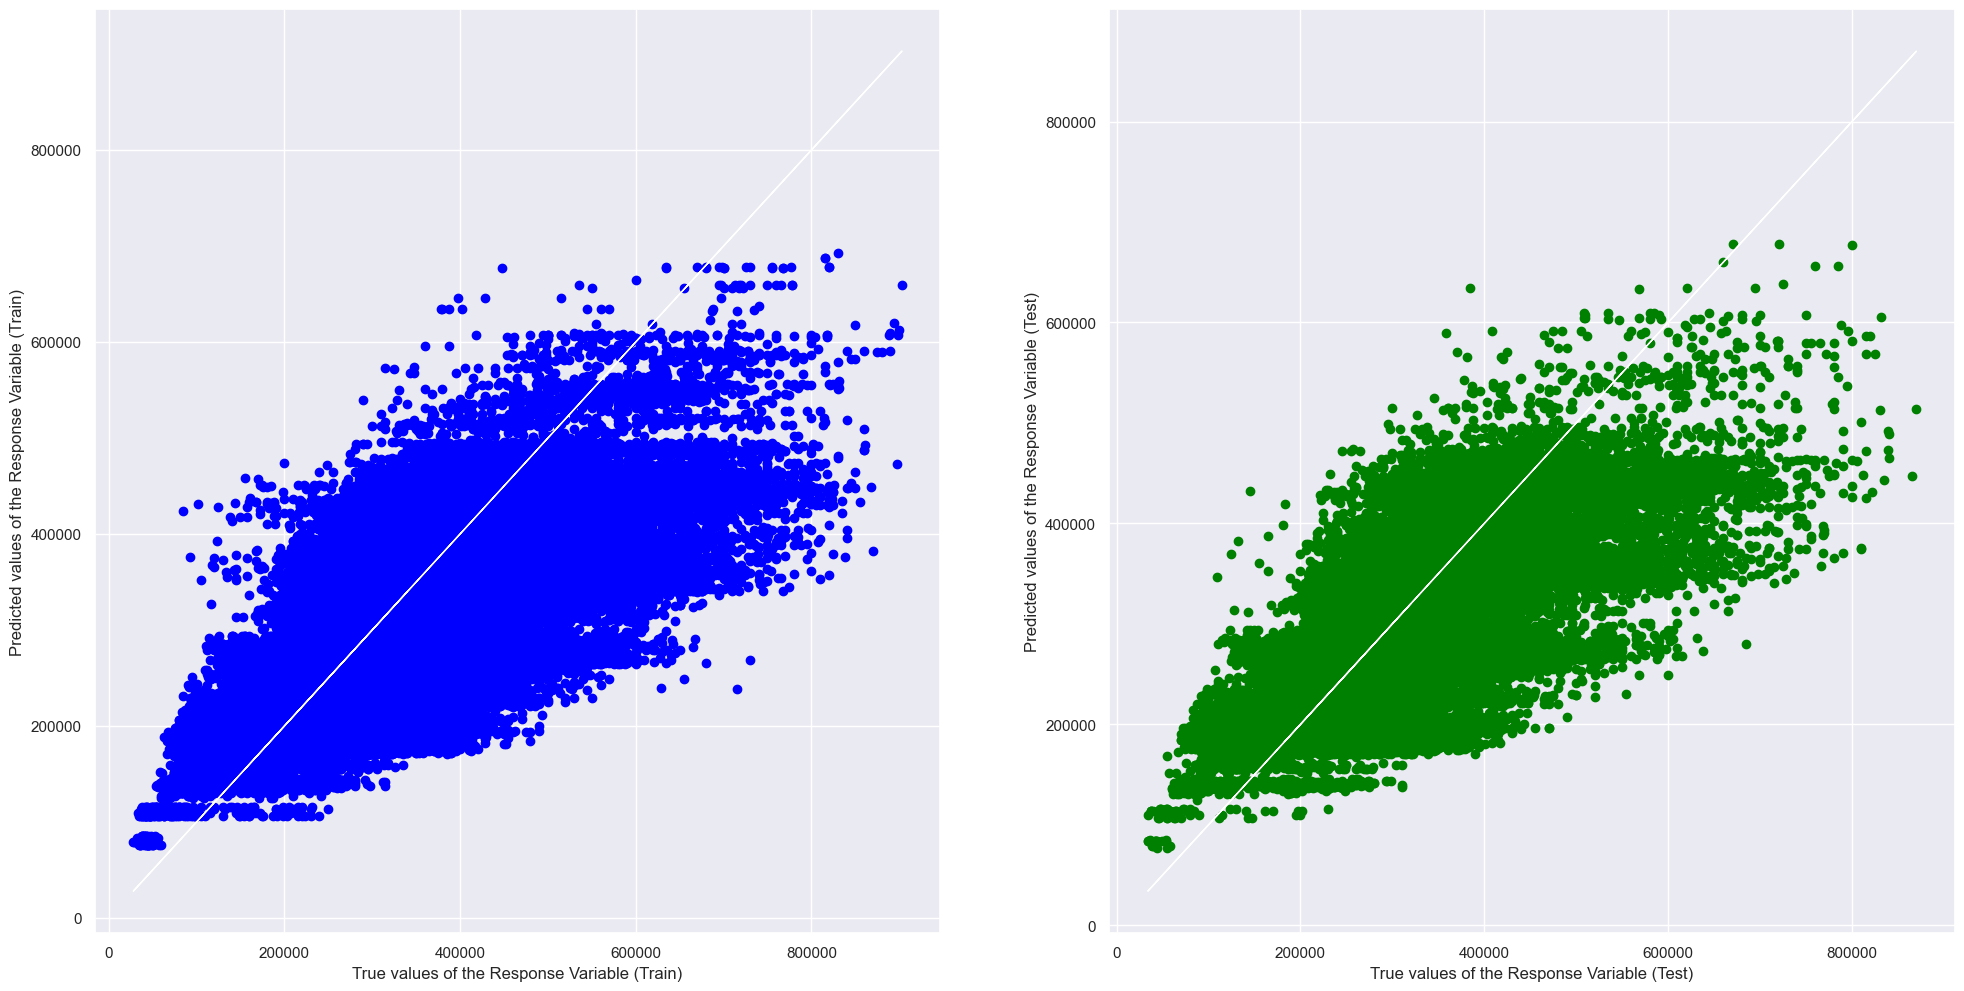

In [9]:
import matplotlib.pyplot as plt

# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [10]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, model.predict(X_train)))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2)
print("Mean Squared Error (MSE) \t:", mse)
print()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5837969693067601
Mean Squared Error (MSE) 	: 5237218744.813478

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5841694599538706
Mean Squared Error (MSE) 	: 5206116848.897781



## RANDOM FOREST

In [17]:
# Import Required Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the Features and Target
X = pd.concat([num_vars, NewCat_ohe], axis=1)
y = data['resale_price']

# Split the Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Model and Train It
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict using the Random Forest model on test data
y_pred = rf.predict(X_test)

# Calculate R-squared and MSE on test data
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, rf.predict(X_train)))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2)
print("Mean Squared Error (MSE) \t:", mse)
print()

# Print the Feature Importances
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature '%s' (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6424336899879545
Mean Squared Error (MSE) 	: 4499373726.7836

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6112865600119017
Mean Squared Error (MSE) 	: 4866616071.755001

Feature ranking:
1. feature 'floor_area_sqm' (0.784216)
2. feature 'lease_commence_date' (0.102362)
3. feature 'flat_type_EXECUTIVE' (0.043346)
4. feature 'storey_range_19 TO 21' (0.005718)
5. feature 'storey_range_22 TO 24' (0.005535)
6. feature 'flat_type_4 ROOM' (0.005174)
7. feature 'storey_range_16 TO 18' (0.004998)
8. feature 'flat_model_Premium Apartment' (0.004934)
9. feature 'flat_model_Improved' (0.004515)
10. feature 'storey_range_13 TO 15' (0.003951)
11. feature 'storey_range_01 TO 03' (0.003918)
12. feature 'storey_range_04 TO 06' (0.003661)
13. feature 'storey_range_10 TO 12' (0.003499)
14. feature 'storey_range_07 TO 09' (0.003353)
15. feature 'storey_range_25 TO 27' (0.003311)
16. feature 'flat_model_Terra

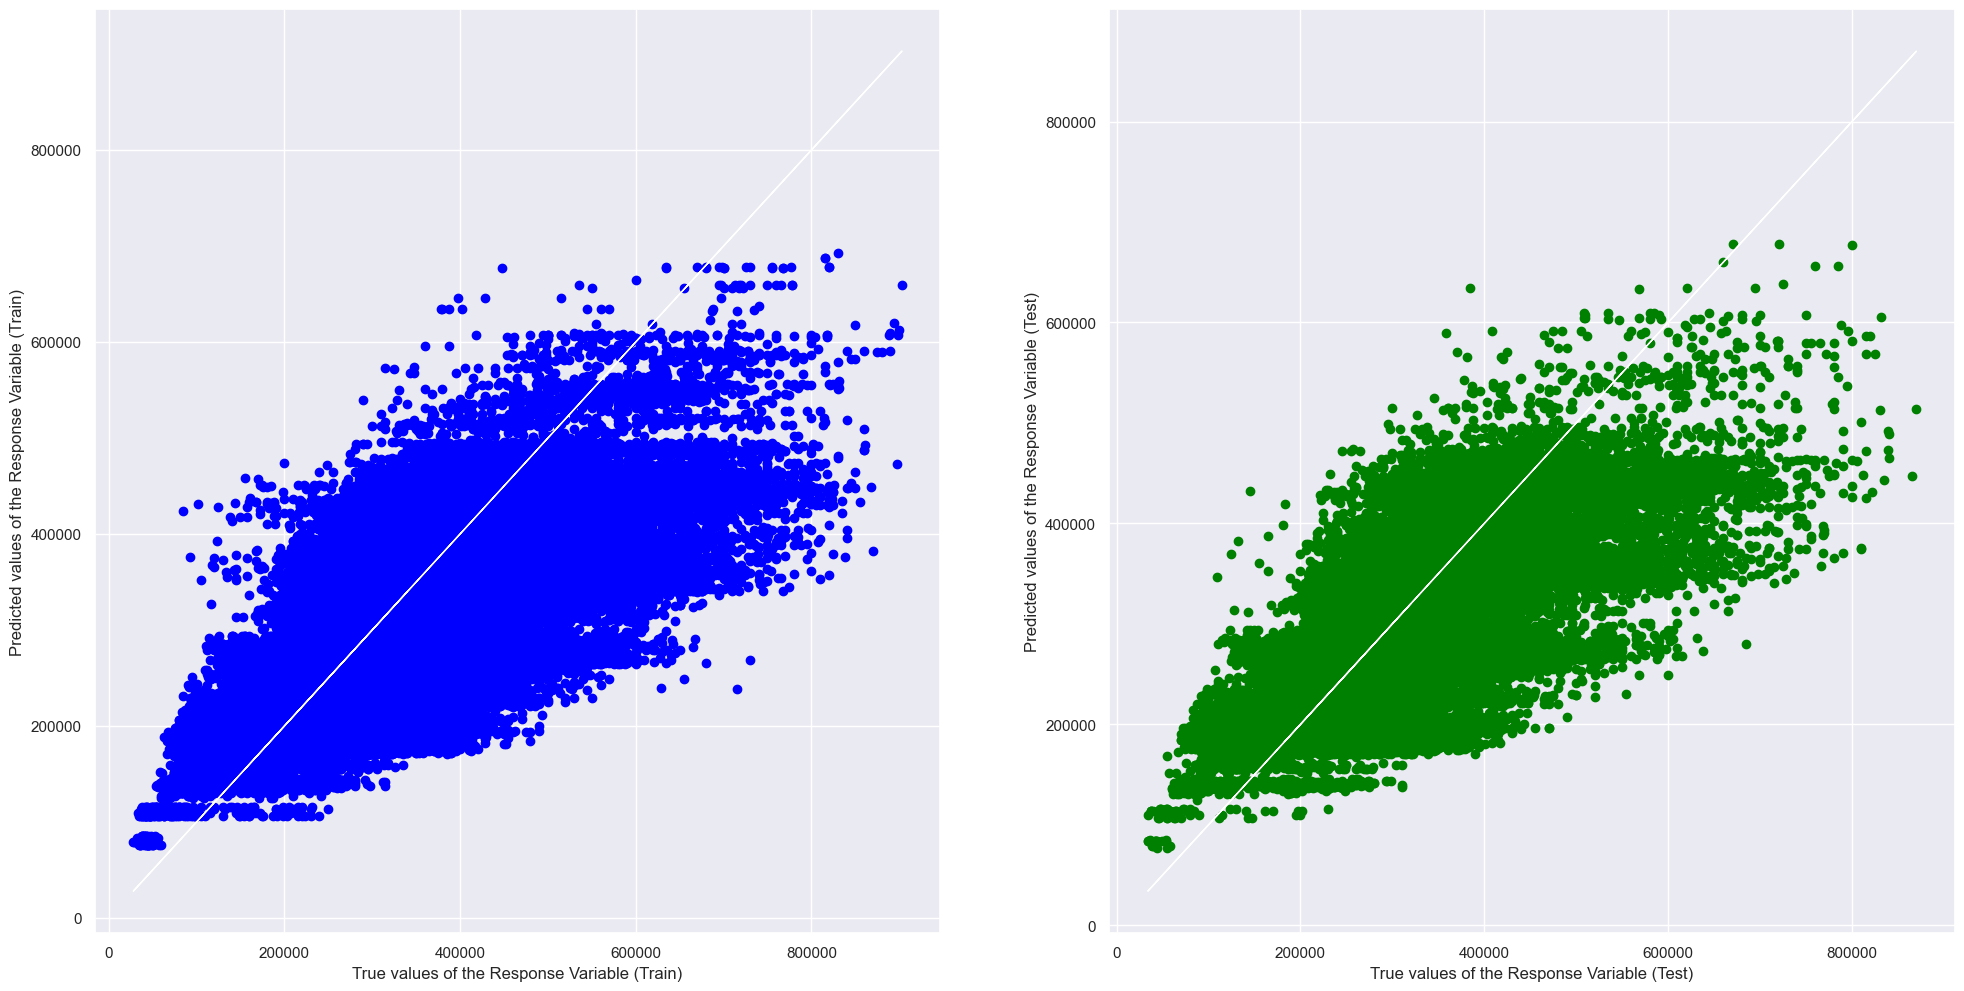

In [12]:
import matplotlib.pyplot as plt

# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [13]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, rf.predict(X_train)))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2)
print("Mean Squared Error (MSE) \t:", mse)
print()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6424336899879545
Mean Squared Error (MSE) 	: 4499373726.7836

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6112865600119017
Mean Squared Error (MSE) 	: 4866616071.755001



## From the 3 different models used, Random forest, Lasso Regression and Gradient boosting

## Random Forest has the highest R^2 and lowest MSE which means it is the best performing model out of the 3.

## floor_area_sqm seems have a very high feature importance in most of these models, implying it might be the best predictor in predicting the resale_price of a HDB flat


## Permutation feature importance

## To further evaluate and support our findings to determine which is the best predictor in determining resale_price

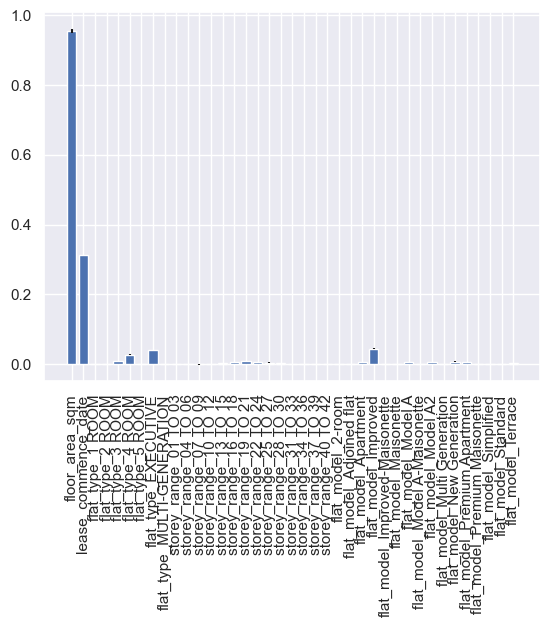

Feature ranking:
1. feature 'floor_area_sqm' (0.956020)
2. feature 'lease_commence_date' (0.312153)
3. feature 'flat_model_Improved' (0.043428)
4. feature 'flat_type_EXECUTIVE' (0.039948)
5. feature 'flat_type_4 ROOM' (0.026636)
6. feature 'storey_range_19 TO 21' (0.008133)
7. feature 'flat_type_3 ROOM' (0.007853)
8. feature 'flat_model_New Generation' (0.006772)
9. feature 'flat_model_Apartment' (0.006376)
10. feature 'storey_range_22 TO 24' (0.006359)
11. feature 'flat_model_Model A' (0.006110)
12. feature 'storey_range_16 TO 18' (0.005928)
13. feature 'flat_model_Premium Apartment' (0.005818)
14. feature 'flat_model_Model A2' (0.004595)
15. feature 'storey_range_25 TO 27' (0.003952)
16. feature 'storey_range_13 TO 15' (0.003793)
17. feature 'flat_model_Terrace' (0.003165)
18. feature 'storey_range_28 TO 30' (0.002295)
19. feature 'flat_model_Simplified' (0.000948)
20. feature 'flat_type_5 ROOM' (0.000461)
21. feature 'flat_model_Standard' (0.000444)
22. feature 'flat_model_Maisonett

In [21]:
from sklearn.inspection import permutation_importance

# Define the Features and Target
X = pd.concat([num_vars, NewCat_ohe], axis=1)
y = data['resale_price']

# Split the Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Model and Train It
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Calculate Permutation Feature Importance
result = permutation_importance(rf, X_test, y_test, n_repeats=5, random_state=42)

# Print the Feature Importance Scores
importances = result.importances_mean
std = result.importances_std

# Plot feature importances with error bars
plt.bar(X.columns, importances, yerr=std)
plt.xticks(rotation=90)
plt.show()

# Print the Feature Importance Scores
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature '%s' (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

## floor_area_sqm is indeed the best predictor amongst all